## Task about lakes

- Generate 20 random variable from 1 to 100
- Draw the plot of the  sequence 
- Lets assume each point represent the height and so all plotting is 2d mountains. 
- Then consider the unlimited rain from above - cavities become lakes full of water. 
- Determine the deepest lake

#### Expected result

You may present the result by visualization or numbers that provide information about the boundaries of the lake and its deepest point

In [15]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
from scipy.ndimage import label
%matplotlib inline

In [17]:
# Generate a numpy array of 20 random integer variables in interval [1, 100] (use 2023 as a seed)
np.random.seed(2025)
heights = np.random.randint(1, 101, size=25)
heights

array([63, 95, 83, 95, 77, 68, 84, 13, 33, 23, 11, 79, 98, 41, 24, 85, 17,
       65,  4, 26, 18, 81, 76, 46, 65])

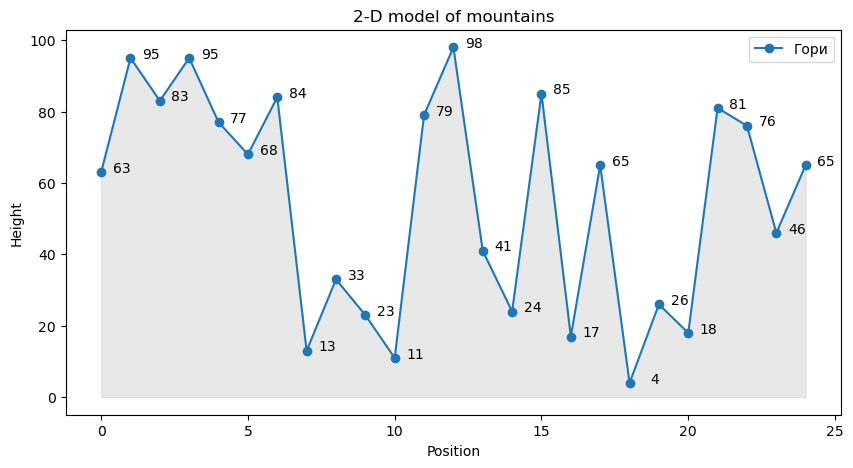

In [18]:
# Show the plot of generated array
x = np.arange(len(heights))
plt.figure(figsize=(10, 5))
plt.plot(x, heights, marker='o', linestyle='-', label='Гори')
plt.fill_between(x, heights, color='lightgray', alpha=0.5)  # Заповнюємо гори сірим
# Додаємо підписи до точок
for i, h in enumerate(heights):
    plt.text(i+1, h, str(h), fontsize=10, ha='right')
plt.xlabel('Position')
plt.ylabel('Height')
plt.title('2-D model of mountains')
plt.legend()
plt.show()

In [19]:
# Searching for the deepest lakes
def find_deepest_lake(heights):
    max_depth = 0
    best_lake = None

    for i in range(1, len(heights) - 1):  # Починаємо з другої точки і йдемо до передостанньої
        left = heights[i - 1]
        center = heights[i]
        right = heights[i + 1]

        # Перевіряємо, чи це западина
        if left > center and right > center:
            depth = min(left, right) - center
            if depth > max_depth:
                max_depth = depth
                best_lake = (i - 1, i, i + 1)  # Індекси найглибшого озера

    return max_depth, best_lake

In [20]:
# Check 
deepest_depth, lake_indexes = find_deepest_lake(heights)
print("Depth of the deepest lake:", deepest_depth)
print("Indexes:", lake_indexes)

Depth of the deepest lake: 48
Indexes: (15, 16, 17)


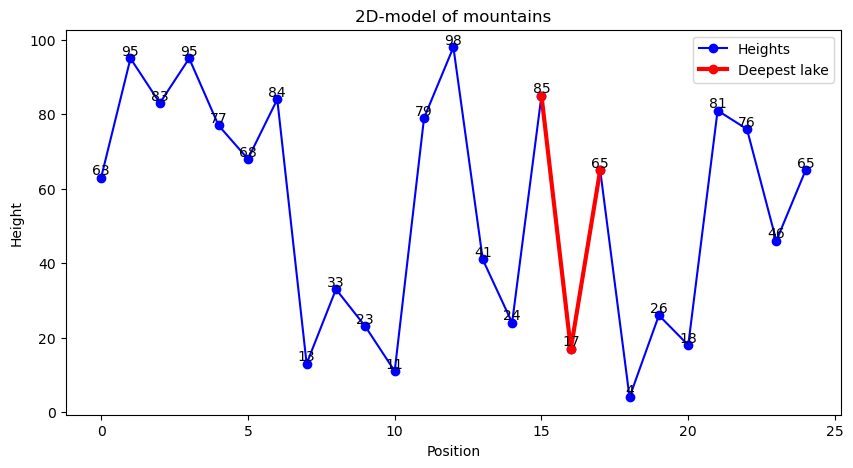

In [21]:
# Visualize the deepest lake
plt.figure(figsize=(10, 5))
plt.plot(x, heights, marker='o', linestyle='-', color='blue', label='Heights')

# Highlighting the deepest lake
if lake_indexes:
    i1, i2, i3 = lake_indexes
plt.plot([i1, i2, i3], [heights[i1], heights[i2], heights[i3]], 
         marker='o', linestyle='-', color='red', linewidth=3, label='Deepest lake')

for i, h in enumerate(heights):
    plt.text(i, h, str(h), fontsize=10, ha='center', va='bottom', color='black')

plt.xlabel('Position')
plt.ylabel('Height')
plt.title('2D-model of mountains')
plt.legend()
plt.show()